# Data Extraction

In [ ]:
!wget -O dental_dataset.zip "https://zenodo.org/records/16745408/files/dental_xray_dataset.zip.zip?download=1"

--2025-12-13 17:27:18--  https://zenodo.org/records/16745408/files/dental_xray_dataset.zip.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.52.235, 188.185.48.75, 188.185.43.153, ...
Connecting to zenodo.org (zenodo.org)|137.138.52.235|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14814675 (14M) [application/octet-stream]
Saving to: ‘dental_dataset.zip’

dental_dataset.zip  100%[===================>]  14.13M  7.68MB/s    in 1.8s    

2025-12-13 17:27:21 (7.68 MB/s) - ‘dental_dataset.zip’ saved [14814675/14814675]



In [ ]:
!unzip -q dental_dataset.zip -d dental_data
!mv "/content/dental_data/dataset ++" "/content/dental_data/dataset"

In [ ]:
import os

DATA_DIR = "/content/dental_data/dataset"

print("Total images:", len(os.listdir(DATA_DIR)))
print(os.listdir(DATA_DIR)[:5])   # preview first 5


Total images: 296
['16 22.jpg', '16 19.jpg', '12 30.jpg', '12 28.jpg', '12 25.jpg']


## Dataset for YOLOv8s

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # preview first 5
# SOURCE_YOLOv8 = "/content/drive/MyDrive/yolo_dataset/yolo_train_dataset/train/images"

# print("Total images:", len(os.listdir(SOURCE_YOLOv8)))
# print(os.listdir(SOURCE_YOLOv8)[:5])

Total images: 894
['cate2-00013_jpg.rf.da4935dbff7e1b6b9d792b2066a57033.jpg', 'cate2-00021_jpg.rf.b7ebb4be90676f76ecc58586e34e17b4.jpg', 'cate10-00042_jpg.rf.d1a7265353b131896cd479112a69a551.jpg', 'cate10-00013_jpg.rf.10de44f8963729975e3eac586f54333f.jpg', 'cate2-00008_jpg.rf.8c78605c9b5a4c0ddc8bfbef1a731f28.jpg']


# YOLOv8

If you're running this locally or on your personal google colab you can use this location for the data parameter:
`content\yolo_dataset\yolo_train_dataset\data.yaml `

In [ ]:
!pip install ultralytics
from ultralytics import YOLO

model = YOLO("yolov8s.pt")
model.train(
    data="/content/drive/MyDrive/yolo_dataset/yolo_train_dataset/data.yaml",
    epochs=30, imgsz=640, cache=True, single_cls=True, val=True, dropout=0.6, close_mosaic=0, cos_lr=True, exist_ok=True, warmup_epochs=10, lrf=0.005

)

Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=0, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/drive/MyDrive/yolo_dataset/yolo_train_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.6, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.005, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, persp

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7964745ddb80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
import shutil
import os

# Create the 'models' directory if it doesn't exist
os.makedirs("models", exist_ok=True)

shutil.copy(
    "runs/detect/train/weights/best.pt",
    "models/tooth_detector_best.pt"
)

In [ ]:
shutil.make_archive("runs", 'zip', "runs")
shutil.make_archive("models", 'zip', "models")

'/content/models.zip'

In [ ]:
!unzip -q models.zip

In [ ]:
import shutil
!mkdir -p /content/tooth_crops
!pip install ultralytics

from ultralytics import YOLO
import cv2
import os

# model = YOLO("runs/detect/train/weights/best.pt")
model = YOLO("/content/models/tooth_detector_best.pt")
input_dir = "/content/dental_data/dataset"
crop_dir = "/content/tooth_crops"

for f in os.listdir(input_dir):
    if not f.endswith(".jpg"): continue
    img_path = os.path.join(input_dir, f)
    base = os.path.splitext(f)[0]

    results = model(img_path, save=False, verbose=False)
    boxes = results[0].boxes.xyxy.cpu().numpy()

    img = cv2.imread(img_path)
    idx = 0
    for (x1,y1,x2,y2) in boxes:
        crop = img[int(y1):int(y2), int(x1):int(x2)]
        out_path = os.path.join(crop_dir, f"{base}_tooth{idx}.jpg")
        cv2.imwrite(out_path, crop)
        idx += 1

print("Cropping finished.")

Cropping finished.


In [ ]:
shutil.make_archive("tooth_crops", 'zip', "tooth_crops")

'/content/tooth_crops.zip'

# Data Handling

In [1]:
import os
import re
import pandas as pd

In [3]:
!unzip -q tooth_crops.zip -d tooth_crops

In [4]:
DATA_DIR = "/content/tooth_crops"

files = os.listdir(DATA_DIR)
ages = []
paths = []

for f in files:
    if f.endswith(".jpg") or f.endswith(".png"):

        # Extract the FIRST integer in the filename
        match = re.match(r"(\d+)", f)
        if match:
            age = int(match.group(1))
            ages.append(age)
            paths.append(os.path.join(DATA_DIR, f))
        else:
            print("WARNING: No age found in filename:", f)

df = pd.DataFrame({
    "image": paths,
    "age": ages
})

In [5]:
df.to_csv("age_labels.csv", index=False)

In [6]:
df=pd.read_csv("age_labels.csv")

df.describe()

,age
count,9146.000000
mean,15.079488
std,2.416528
min,9.000000
25%,13.000000
50%,16.000000
75%,17.000000
max,19.000000


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split

# df has columns: image, age (int)
df = pd.read_csv("age_labels.csv")

# create bins
bins = [9 ,10, 11, 12, 13, 14, 15, 16, 17, 18, 19]   # tune as needed
df['age_bin'] = pd.cut(df['age'], bins=bins, labels=False, include_lowest=True)

# stratified split
train_idx, val_idx = train_test_split(df.index, test_size=0.2,
                                     stratify=df['age_bin'], random_state=42)
train_df = df.loc[train_idx].reset_index(drop=True)
val_df   = df.loc[val_idx].reset_index(drop=True)


In [ ]:
df

,image,age,age_bin
0,/content/tooth_crops/16 21_tooth28.jpg,16,6
1,/content/tooth_crops/16 11_tooth15.jpg,16,6
2,/content/tooth_crops/16 28_tooth3.jpg,16,6
3,/content/tooth_crops/16 25_tooth25.jpg,16,6
4,/content/tooth_crops/12 31_tooth13.jpg,12,2
...,...,...,...
9141,/content/tooth_crops/17 51_tooth22.jpg,17,7
9142,/content/tooth_crops/12 23_tooth22.jpg,12,2
9143,/content/tooth_crops/18 34_tooth20.jpg,18,8
9144,/content/tooth_crops/15 20_tooth32.jpg,15,5


TODO:
- fix the model for the image
- find a way to take the images to the model

In [8]:
import tensorflow as tf

IMG_SIZE = 224

def load_img(img_path, age):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)

    # keep aspect ratio, pad to square, then resize
    img = tf.image.resize_with_pad(img, IMG_SIZE, IMG_SIZE)

    img = img / 255.0
    return img, tf.cast(age, tf.float32)

def dataframe_to_dataset(df, shuffle=True, batch_size=32):
    paths = df["image"].astype(str).values
    ages  = df["age"].values

    ds = tf.data.Dataset.from_tensor_slices((paths, ages))
    ds = ds.map(load_img, num_parallel_calls=tf.data.AUTOTUNE)

    if shuffle:
        ds = ds.shuffle(500)

    ds = ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return ds

train_ds = dataframe_to_dataset(train_df)
val_ds   = dataframe_to_dataset(val_df, shuffle=False)

# EfficientNetB0 Model Training

### Training Phase 1

In this phase, EfficientNetB0 pretrained on ImageNet is used as a fixed feature extractor by freezing all backbone layers. Only the newly added regression head is trained to adapt high-level visual features to the dental X-ray domain. The model is optimized using Adam (lr = 1e-3) with MSE loss and MAE as the evaluation metric. This phase serves as a warm-up stage before fine-tuning the backbone in later phases.

In [9]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping


base = EfficientNetB0(include_top=False, input_shape=(224,224,3), weights='imagenet')

base.trainable = False

x = GlobalAveragePooling2D()(base.output)
x = Dropout(0.1)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.1)(x)
output = Dense(1)(x)

model = Model(inputs=base.input, outputs=output)

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss='mse',
    metrics=['mae']
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,213,668 (16.07 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [11]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=10,
    min_delta=1e-4,
    restore_best_weights=True
)

history = model.fit(train_ds, validation_data=val_ds, epochs=50, callbacks=[early_stopping])

Epoch 1/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 77s 196ms/step - loss: 33.0782 - mae: 4.0464 - val_loss: 5.8583 - val_mae: 2.0688
Epoch 2/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 27s 53ms/step - loss: 6.9235 - mae: 2.1860 - val_loss: 6.1726 - val_mae: 2.1670
Epoch 3/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 6.8846 - mae: 2.1854 - val_loss: 5.9134 - val_mae: 2.0567
Epoch 4/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 6.5971 - mae: 2.1336 - val_loss: 5.9060 - val_mae: 2.0575
Epoch 5/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 6.6765 - mae: 2.1541 - val_loss: 6.7020 - val_mae: 2.0191
Epoch 6/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 6.6799 - mae: 2.1575 - val_loss: 5.8961 - val_mae: 2.0963
Epoch 7/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - loss: 6.5011 - mae: 2.1384 - val_loss: 6.1095 - val_mae: 2.0412
Epoch 8/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - loss: 6.4374 - mae: 2.1279 - val_loss: 5.8667 - val_mae: 2.0798
Epoch 9/50
229/229 ━━━━━━━━━━━━━━━━━━━

#### Model Evaluation for Phase 1

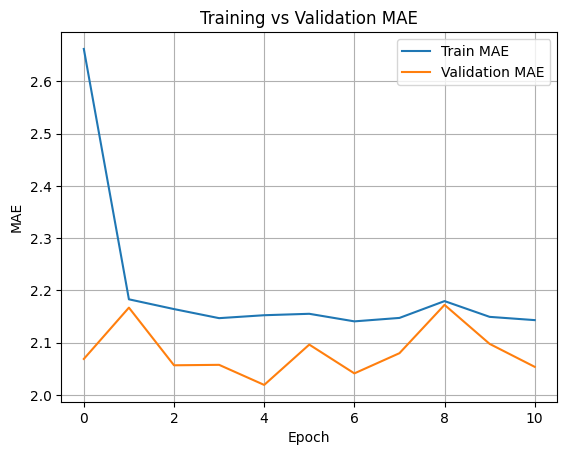

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training vs Validation MAE')
plt.legend()
plt.grid(True)
plt.show()


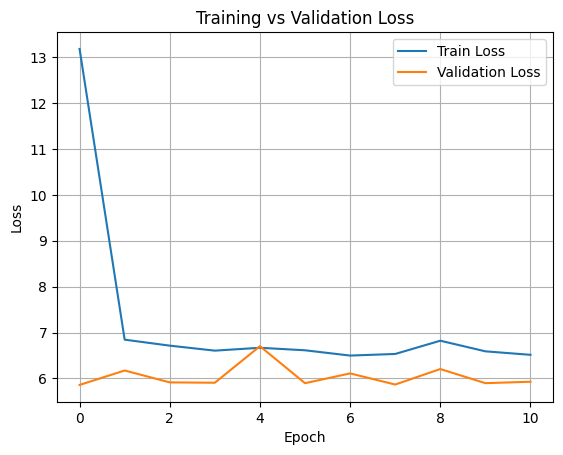

In [22]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


### Training Phase 2



In [14]:
for layer in base.layers[-40:]:
    layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='mse',
    metrics=['mae']
)

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=10,
    min_delta=1e-4,
    restore_best_weights=True
)

history2 = model.fit(train_ds, validation_data=val_ds, epochs=50, callbacks=[early_stopping])


Epoch 1/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 76s 198ms/step - loss: 120.9531 - mae: 9.5375 - val_loss: 11.2827 - val_mae: 2.5844
Epoch 2/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 7.7160 - mae: 2.2770 - val_loss: 7.5072 - val_mae: 2.1213
Epoch 3/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 7.0752 - mae: 2.1938 - val_loss: 7.3555 - val_mae: 2.1041
Epoch 4/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 6.8439 - mae: 2.1653 - val_loss: 6.8068 - val_mae: 2.0353
Epoch 5/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - loss: 6.8874 - mae: 2.1871 - val_loss: 6.4360 - val_mae: 2.0188
Epoch 6/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 6.8068 - mae: 2.1762 - val_loss: 6.5809 - val_mae: 2.0161
Epoch 7/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - loss: 6.6347 - mae: 2.1411 - val_loss: 6.2542 - val_mae: 2.0253
Epoch 8/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - loss: 6.7252 - mae: 2.1517 - val_loss: 6.1176 - val_mae: 2.0313
Epoch 9/50
229/229 ━━━━━━━━━━━━━━━━━

#### Model Evaluation for Phase 2

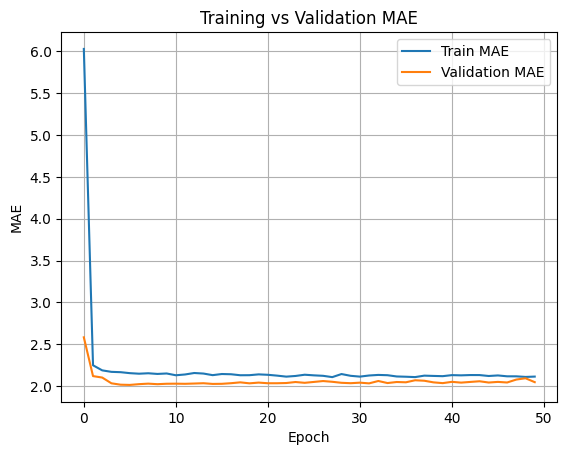

In [20]:
plt.plot(history2.history['mae'], label='Train MAE')
plt.plot(history2.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training vs Validation MAE')
plt.legend()
plt.grid(True)
plt.show()

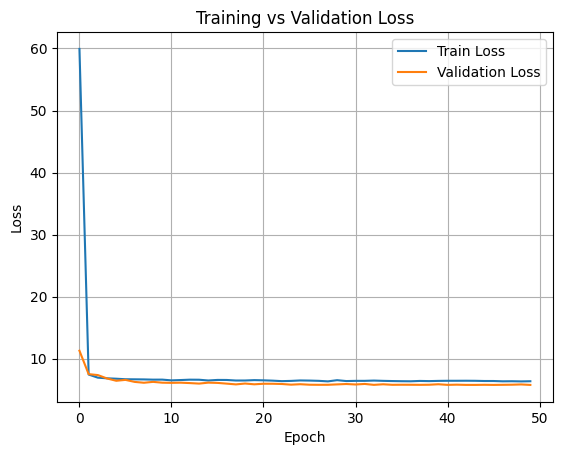

In [23]:
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

## Training Phase 3

In [17]:
base.trainable = True


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6),
    loss="mse",
    metrics=["mae"]
)

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True
)

history3 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 157s 359ms/step - loss: 340.8172 - mae: 18.2214 - val_loss: 65.1732 - val_mae: 7.7025
Epoch 2/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 33s 140ms/step - loss: 274.2776 - mae: 16.2969 - val_loss: 113.6917 - val_mae: 10.2847
Epoch 3/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 33s 142ms/step - loss: 193.4973 - mae: 13.5339 - val_loss: 56.9124 - val_mae: 7.1315
Epoch 4/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 32s 137ms/step - loss: 107.4427 - mae: 9.8541 - val_loss: 58.8751 - val_mae: 7.0778
Epoch 5/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 33s 143ms/step - loss: 57.3793 - mae: 6.9788 - val_loss: 69.6300 - val_mae: 7.3372
Epoch 6/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 41s 141ms/step - loss: 32.8240 - mae: 5.0549 - val_loss: 63.2263 - val_mae: 5.6538
Epoch 7/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 41s 140ms/step - loss: 21.1314 - mae: 3.9194 - val_loss: 33.0933 - val_mae: 4.1547
Epoch 8/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 33s 141ms/step - loss: 13.7740 - mae: 3.0977 - val_loss: 28.5992 - val_mae: 3.305

#### Model Evaluation for Phase 3

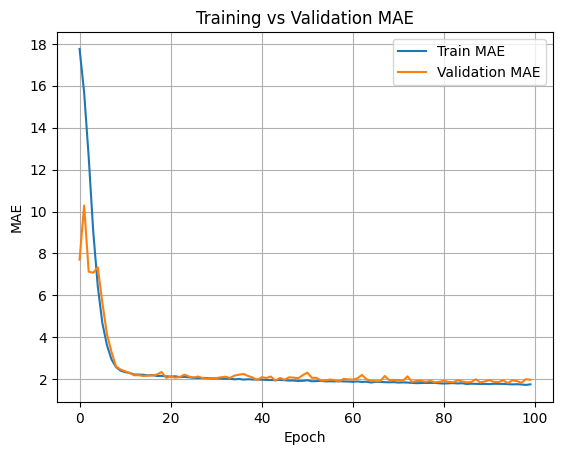

In [18]:
plt.plot(history3.history['mae'], label='Train MAE')
plt.plot(history3.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training vs Validation MAE')
plt.legend()
plt.grid(True)
plt.show()

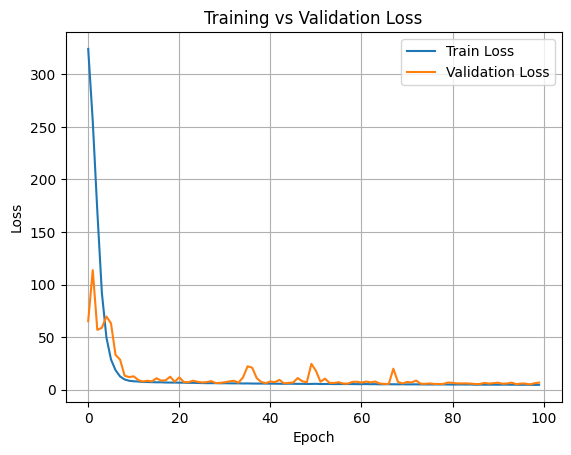

In [19]:
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
model.save("/content/models/efficientNetB0_Age_Regression.keras")